In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Historical Product Demand.csv')

In [3]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
data.shape

(1048575, 5)

In [5]:
data.Date = pd.to_datetime(data.Date)
data.Date.min(), data.Date.max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [6]:
data.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,1000
freq,16936,764447,481099,2075,112682
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN


In [7]:
data.Order_Demand = data.Order_Demand.str.replace('(', '')
data.Order_Demand = data.Order_Demand.str.replace(')', '')

In [8]:
data.Order_Demand = data.Order_Demand.astype(float)

In [9]:
data.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [10]:
data[['Product_Code', 'Warehouse', 'Product_Category']].describe()

,Product_Code,Warehouse,Product_Category
count,1048575,1048575,1048575
unique,2160,4,33
top,Product_1359,Whse_J,Category_019
freq,16936,764447,481099


In [11]:
data.isna().sum()/data.shape[0]

Product_Code        0.000000
Warehouse           0.000000
Product_Category    0.000000
Date                0.010718
Order_Demand        0.000000
dtype: float64

In [12]:
data = data[data['Date'].notnull()]
data.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [13]:
data.groupby('Product_Category')['Order_Demand'].agg('sum').reset_index().sort_values(by = 'Order_Demand', ascending = False).head()

,Product_Category,Order_Demand
18,Category_019,4.240159e+09
5,Category_006,4.055713e+08
4,Category_005,1.996745e+08
6,Category_007,1.286915e+08
27,Category_028,4.905535e+07


<AxesSubplot:xlabel='Product_Category'>

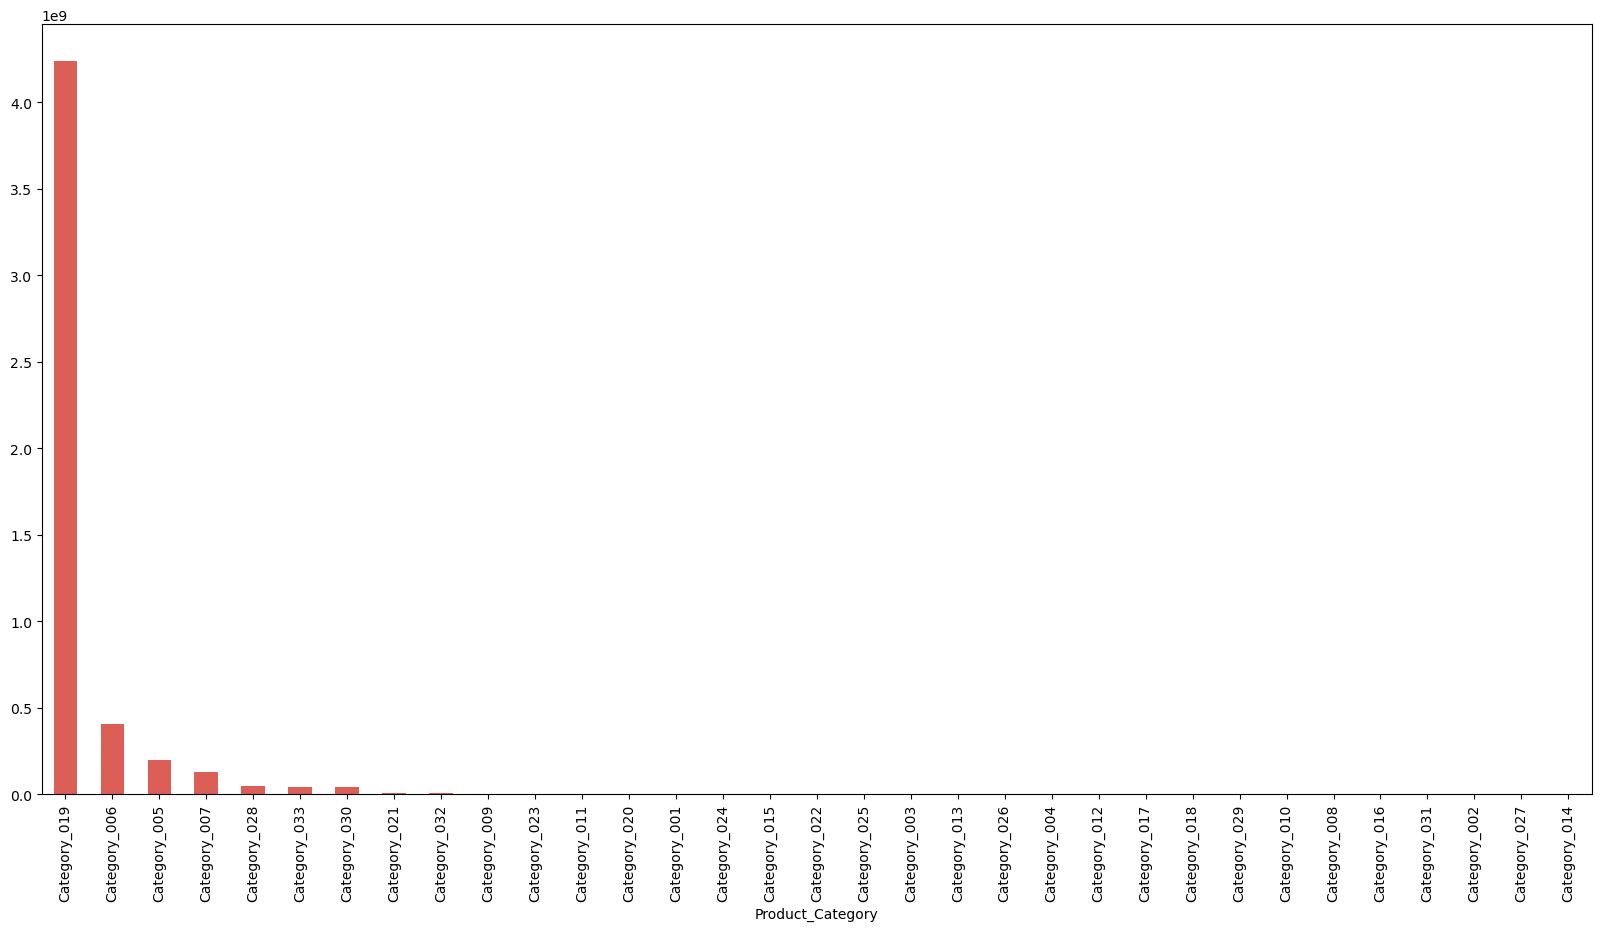

In [14]:
sns.set_palette(sns.color_palette('hls', 8))
plt.figure(figsize = (20, 10))
data.groupby('Product_Category')['Order_Demand'].agg('sum').sort_values(ascending = False).plot(kind = 'bar')

005, 006, 007 and 019 are major product categories

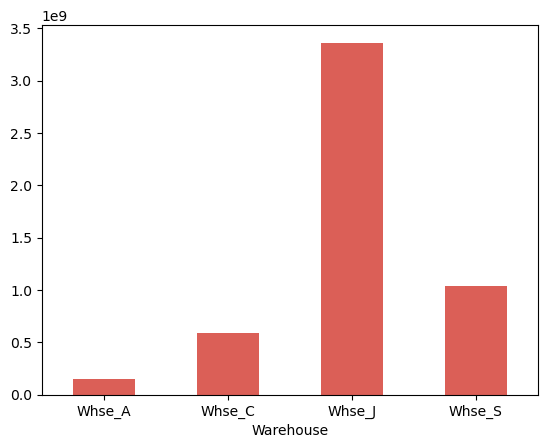

In [15]:
data.groupby('Warehouse')['Order_Demand'].agg('sum').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Seasonality in the data

In [16]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

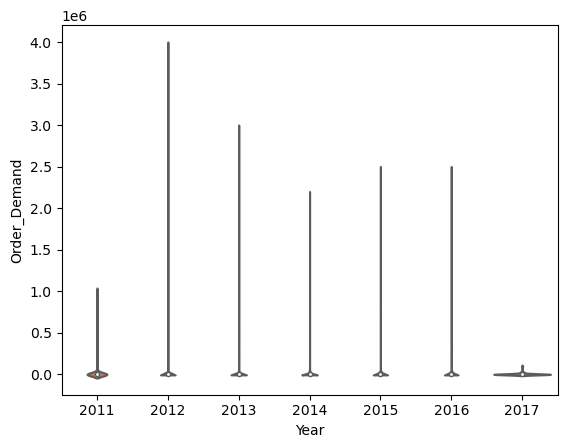

In [18]:
sns.violinplot(x = "Year", y = 'Order_Demand', data = data)
plt.show()

<AxesSubplot:xlabel='Year,Month'>

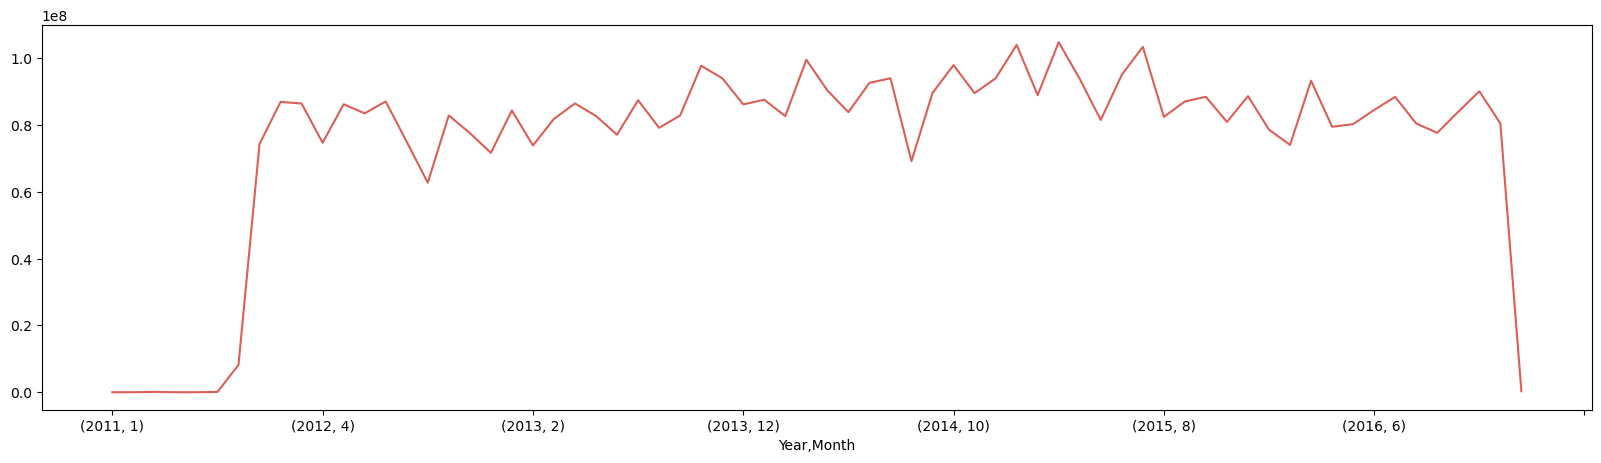

In [19]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby(['Year','Month'])['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year'>

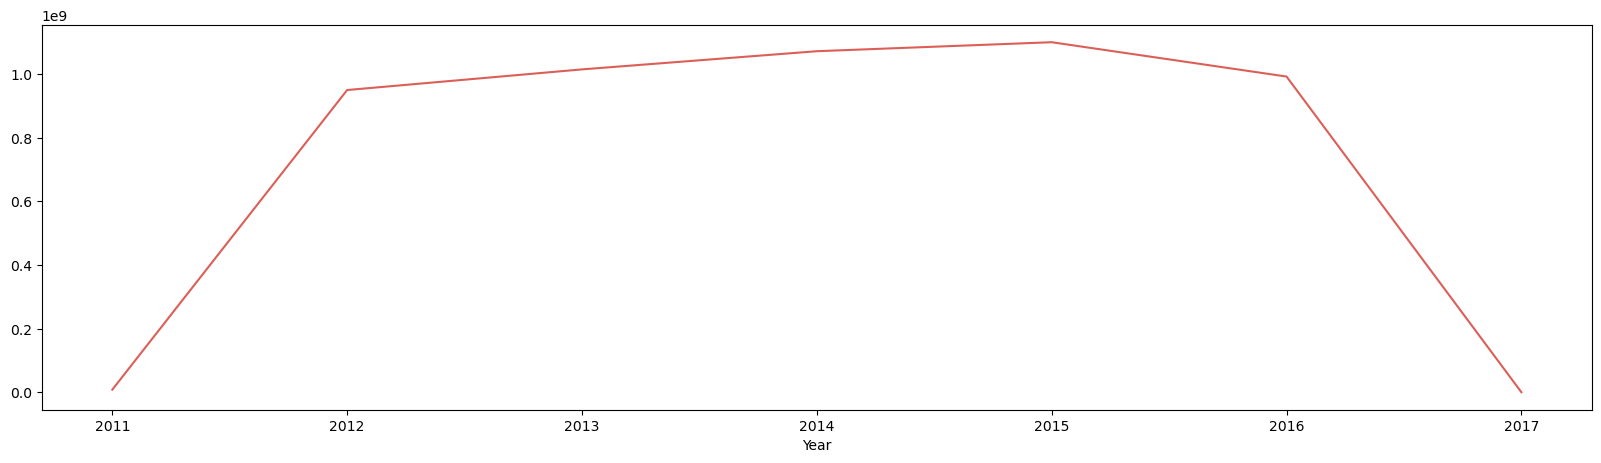

In [20]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby('Year')['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

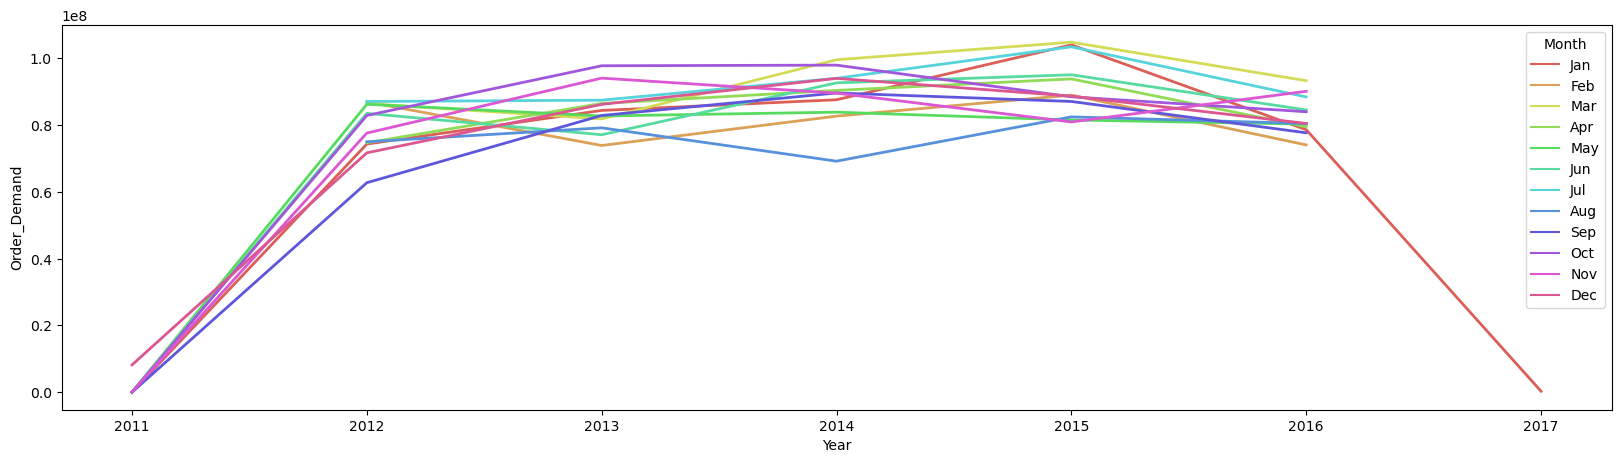

In [21]:
plt.figure(figsize = (20, 5))
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year', 'Month'], ascending = False)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 12))
sns.lineplot(data=temp, x="Year", y="Order_Demand", hue="Month", markers = True, lw = 2, hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


<AxesSubplot:xlabel='Month', ylabel='Order_Demand'>

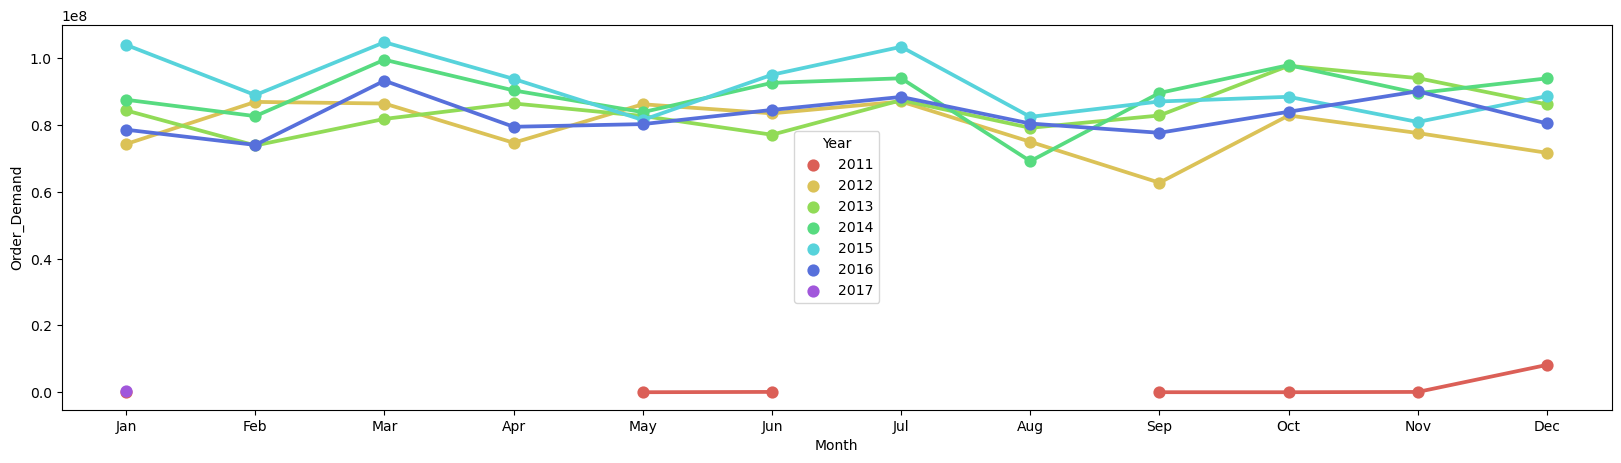

In [22]:
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Month'], ascending = True)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Month", y="Order_Demand", hue="Year")

In [27]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

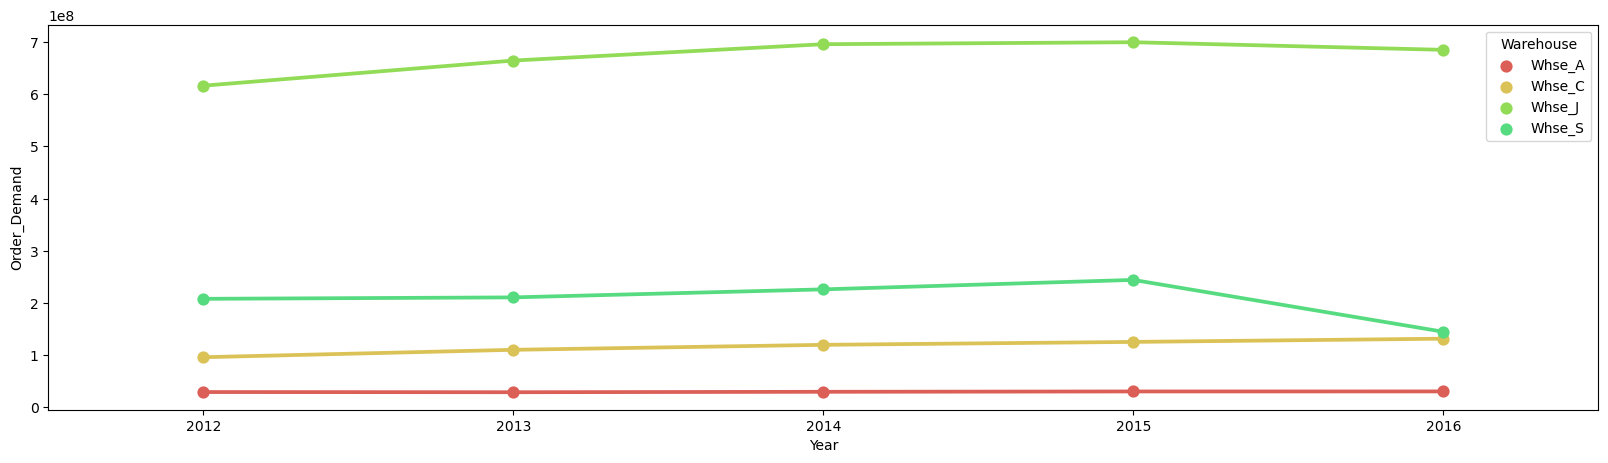

In [28]:
temp = data.groupby(['Year', 'Warehouse'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year'], ascending = True)
#temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Year", y="Order_Demand", hue="Warehouse")

In [23]:
#Excluding all data from 2017 and 2011 to ensure only years with complete data are reflected

data = data[data['Year'] != 2017]
data = data[data['Year'] != 2011]

In [24]:
data['Year'].value_counts()

2013    218298
2014    216404
2015    209661
2012    203635
2016    188645
Name: Year, dtype: int64

<AxesSubplot:xlabel='Month'>

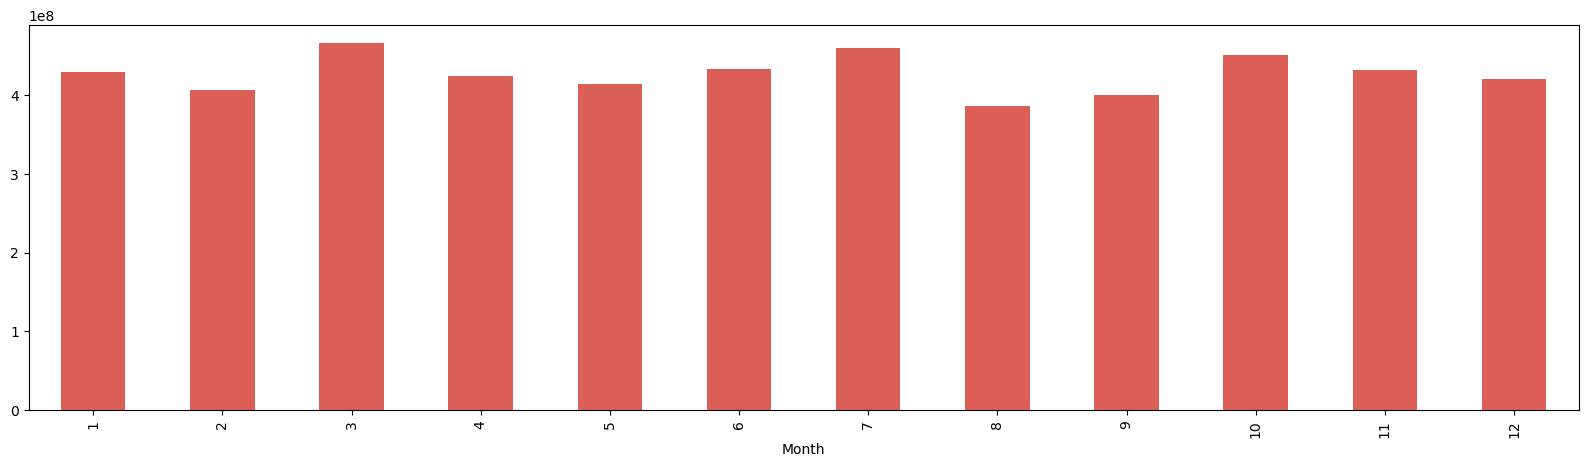

In [25]:
plt.figure(figsize = (20, 5))
data.groupby('Month')['Order_Demand'].agg('sum').plot(kind = 'bar')

In [26]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Warehouse', ylabel='Order_Demand'>

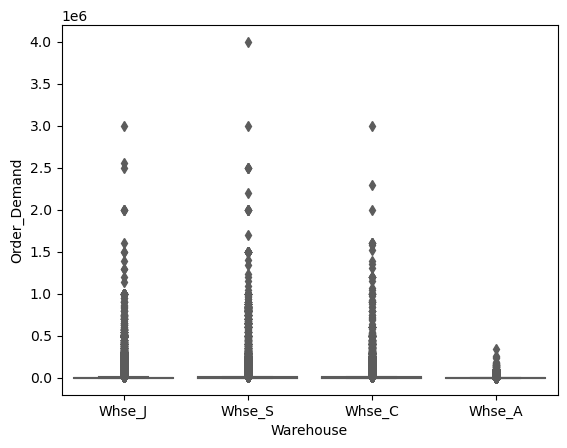

In [29]:
sns.boxplot(data = data, x = 'Warehouse', y  = 'Order_Demand')

<AxesSubplot:xlabel='Warehouse', ylabel='Log_Order_Demand'>

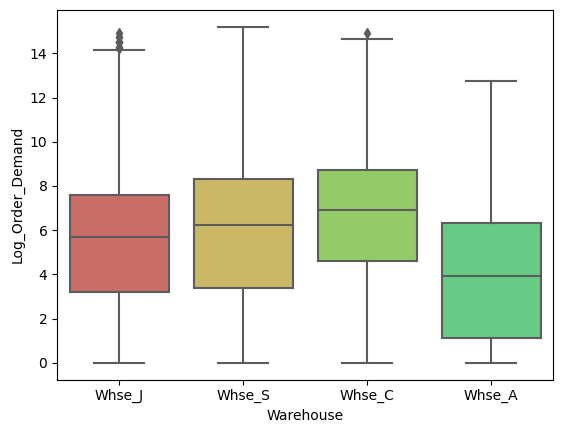

In [30]:
#Log transform of the order demand
temp = data.copy()
temp['Log_Order_Demand'] = np.log(temp['Order_Demand'])
sns.boxplot(data = temp, x = 'Warehouse', y  = 'Log_Order_Demand')

In [48]:
from statsmodels.tsa.seasonal import DecomposeResult

In [47]:
temp = None

month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None
decompose = sm.tsa.seasonal_decompose(month_avg_sales, model = 'additive')
fig = decompose.plot()
plt.show()

AttributeError: module 'statsmodels.tsa' has no attribute 'seasonal_decompose'

In [40]:
month_avg_sales

Date
2012-01-31    4760.537787
2012-02-29    4797.869006
2012-03-31    4647.560310
2012-04-30    4503.559554
2012-05-31    5069.122546
2012-06-30    4938.896517
2012-07-31    4914.299977
2012-08-31    4547.855991
2012-09-30    4018.979632
2012-10-31    4477.001080
2012-11-30    4456.745923
2012-12-31    4771.958735
2013-01-31    5072.665044
2013-02-28    4316.825808
2013-03-31    4705.264126
2013-04-30    4890.554312
2013-05-31    4651.737153
2013-06-30    4696.175751
2013-07-31    4583.131098
2013-08-31    4752.774310
2013-09-30    4374.688905
2013-10-31    3983.279638
2013-11-30    5053.062201
2013-12-31    4955.223244
2014-01-31    4862.820352
2014-02-28    4539.828154
2014-03-31    5019.437824
2014-04-30    5000.381037
2014-05-31    5040.974518
2014-06-30    5216.523590
2014-07-31    4983.481741
2014-08-31    4319.314213
2014-09-30    4724.780601
2014-10-31    5003.498187
2014-11-30    5122.536887
2014-12-31    5550.122808
2015-01-31    5701.752480
2015-02-28    4912.332855
2015-03